# Naive Bayes Classifier

In [1]:
# Importing required modules
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Storing stopwords list

In [2]:
# Stopwords list
stopwords = ["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would"]

## Function to clean the dataset

In [3]:
# Function to clean dataset
def clean(string):
    string = re.sub(r'[\s]+', ' ', string.lower())
    lst = []
    for word in string.split():
        if word not in stopwords:
            lst.append(word)
    string = ' '.join(lst)
    string = re.sub(r'[^A-Za-z\s]', '', string)
    lst = []
    for word in string.split():
        if len(word) > 2:
            lst.append(word)
    string = ' '.join(lst)
    return string

## Reading the dataset

In [4]:
# Reading the data
f = open('dataset_NB.txt', 'r', encoding='utf8')
f = f.read()
print(f)

ment!!    0
Much less than the jawbone I was going to replace it with.  1
Setup went very smoothly.   1
its extremely slow and takes forever to do anything with it.    0
A must study for anyone interested in the "worst sins" of industrial design.    0
The first thing that happened was that the tracking was off.    0
It is well made, easy to access the phone and has a handy, detachable belt clip.    1
Then I had to continue pairing it periodically since it somehow kept dropping.  0
Can't upload ringtones from a third party.  0
Bluetooth does not work, phone locks up, screens just flash up and now it just makes calls randomly while in my pocket locked.  0
Truly awful.    0
It works fine on my Motorola 325 cellphone, and a lot better than the worn-out battery did. 1
The volume for the ringer is REAL good (you have choices how loud). 1
And none of the tones is acceptable.    0
camera color balance is AWFUL.  0
This product is clearly not ready for prime time, I don't care how cool it looks

## Creating Features and Class array

In [5]:
lines = f.splitlines()
X = []
Y = []
for line in lines:
    l = line.split()
    cleaned = clean(' '.join(l[:-1]))
    if len(cleaned) > 0:
        Y.append(int(l[-1]))
        X.append(cleaned)

## Functions to calculate probabilities

In [6]:
def find_counts(spam, non_spam):
    unique_words_spam = set()
    for sentence in spam:
        for word in sentence.split():
            unique_words_spam.add(word)
    unique_words_spam = list(unique_words_spam)

    spam_count_dict = {}
    total_spam_count = 0
    for word in unique_words_spam:
        emails_with_word = 0
        for sentence in spam:
            if word in sentence:
                emails_with_word += 1
        spam_count_dict[word] = emails_with_word
        total_spam_count += emails_with_word

    unique_words_non_spam = set()
    for sentence in non_spam:
        for word in sentence.split():
            unique_words_non_spam.add(word)
    unique_words_non_spam = list(unique_words_non_spam)
    
    non_spam_count_dict = {}
    total_non_spam_count = 0
    for word in unique_words_non_spam:
        emails_with_word = 0
        for sentence in non_spam:
            if word in sentence:
                emails_with_word += 1
        non_spam_count_dict[word] = emails_with_word
        total_non_spam_count += emails_with_word

    return spam_count_dict, non_spam_count_dict, total_spam_count, total_non_spam_count

In [7]:
def Bayes(email, spam_dict, nonspam_dict, spam_prob, nonspam_prob, total_spam, total_nonspam, alpha = 1):
    email = email.split()
    probs = []

    #finding prob of spam
    for word in email:
        x = spam_dict.get(word, 0)
        prob_w_given_spam = (x+alpha)/(total_spam + alpha*len(spam_dict))
        spam_prob *= prob_w_given_spam
            
    #finding prob of nonspam
    for word in email:
        x = nonspam_dict.get(word, 0)
        prob_w_given_nonspam = (x+alpha)/(total_nonspam + alpha*len(nonspam_dict))
        nonspam_prob *= prob_w_given_nonspam

    return 1 if spam_prob >= nonspam_prob else 0

## Creating K-Folds and calling the functions

In [8]:
a = list(zip(X, Y))
np.random.shuffle(a)
X, Y = list(zip(*a))

size = len(X) // 7
accuracies = []

for i in range(7):
    print(f'\nFold {i+1}')
    X_test = X[i*size : (i+1)*size]
    X_train = X[0 : i*size] + X[(i+1)*size : ]
    Y_test = Y[i*size : (i+1)*size]
    Y_train = Y[0 : i*size] + Y[(i+1)*size : ]

    # Training Naive Bayes Classifier
    spam = []
    non_spam = []
    for text, c in zip(X_train, Y_train):
        if c == 1:
            spam.append(text)
        else:
            non_spam.append(text)

    prob_spam = len(spam) / (len(spam) + len(non_spam))
    prob_nonspam = len(non_spam) / (len(spam) + len(non_spam))
    spam_count_dict, non_spam_count_dict, total_spam_count, total_non_spam_count = find_counts(spam, non_spam)

    tp = 0
    tn = 0
    fp = 0
    fn = 0

    # Testing the model
    for sentence, c in zip(X_test, Y_test):
        final_classification = Bayes(sentence, spam_count_dict, non_spam_count_dict, prob_spam, prob_nonspam, total_spam_count, total_non_spam_count)

        if final_classification == 1:
            if c == 1:
                tp += 1
            else:
                fp += 1
        else:
            if c == 1:
                fn += 1
            else:
                tn += 1

    print(f'True negatives are {tn}')
    print(f'True positives are {tp}')
    print(f'False negatives are {fn}') 
    print(f'False positives are {fp}')
    accuracy = (tp+tn)/(tp+tn+fp+fn) * 100
    print(f'Percentage of emails correctly classified: {accuracy}')
    accuracies.append(accuracy)

print(f'\nAverage accuracy is {np.mean(accuracies)}')


Fold 1
True negatives are 49
True positives are 64
False negatives are 7
False positives are 22
Percentage of emails correctly classified: 79.5774647887324

Fold 2
True negatives are 55
True positives are 48
False negatives are 11
False positives are 28
Percentage of emails correctly classified: 72.53521126760563

Fold 3
True negatives are 40
True positives are 66
False negatives are 12
False positives are 24
Percentage of emails correctly classified: 74.64788732394366

Fold 4
True negatives are 40
True positives are 65
False negatives are 7
False positives are 30
Percentage of emails correctly classified: 73.94366197183099

Fold 5
True negatives are 45
True positives are 67
False negatives are 6
False positives are 24
Percentage of emails correctly classified: 78.87323943661971

Fold 6
True negatives are 45
True positives are 67
False negatives are 9
False positives are 21
Percentage of emails correctly classified: 78.87323943661971

Fold 7
True negatives are 40
True positives are 62

## Visualizing the results

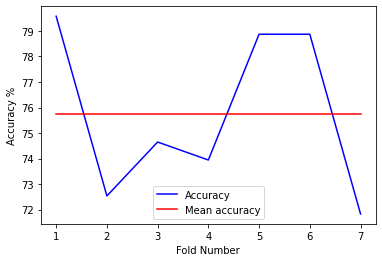

In [9]:
plt.figure()
plt.plot(list(range(1, 8)), accuracies, color = 'blue', label = 'Accuracy')
plt.plot(list(range(1, 8)), [np.mean(accuracies)]*7, color = 'red', label = 'Mean accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy %')
plt.legend();